<a href="https://colab.research.google.com/github/Mayank7382/Zeotap_Assignment/blob/main/Mayank_Gupta_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions (1).csv')

In [3]:
transactions_head = transactions.head()
products_head = products.head()
customers_head = customers.head()

transactions_head, products_head, customers_head

(  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   CustomerID        CustomerName         Region  SignupDate

In [5]:
transactions_products_df = pd.merge(transactions, products, on="ProductID", how="left")

In [8]:
merged_data = pd.merge(transactions_products_df, customers, on="CustomerID", how="left")



In [9]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [10]:
from datetime import datetime



In [11]:
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["SignupDate"] = pd.to_datetime(merged_data["SignupDate"])

In [12]:
latest_date = merged_data["TransactionDate"].max()

In [13]:
customer_features = merged_data.groupby("CustomerID").agg(
    TotalSpending=("TotalValue", "sum"),
    TransactionCount=("TransactionID", "nunique"),
    AvgBasketValue=("TotalValue", "mean"),
    SignupDate=("SignupDate", "first"),
    Region=("Region", "first"),
).reset_index()

In [14]:
customer_features["TimeSinceSignup"] = (latest_date - customer_features["SignupDate"]).dt.days



In [15]:
customer_features.drop(columns=["SignupDate"], inplace=True)

# Preview the customer features
customer_features.head()

,CustomerID,TotalSpending,TransactionCount,AvgBasketValue,Region,TimeSinceSignup
0,C0001,3354.52,5,670.904,South America,902
1,C0002,1862.74,4,465.685,Asia,1049
2,C0003,2725.38,4,681.345,South America,296
3,C0004,5354.88,8,669.360,South America,811
4,C0005,2034.24,3,678.080,Asia,866


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
numerical_features = ["TotalSpending", "TransactionCount", "AvgBasketValue", "TimeSinceSignup"]
categorical_features = ["Region"]

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

In [20]:
clustering_data = preprocessor.fit_transform(customer_features)

# Check the transformed data shape
clustering_data.shape

(199, 8)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt



In [22]:
cluster_range = range(2, 11)
db_scores = []

In [23]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(clustering_data)
    db_index = davies_bouldin_score(clustering_data, labels)
    db_scores.append(db_index)

In [24]:
ptimal_clusters = cluster_range[db_scores.index(min(db_scores))]

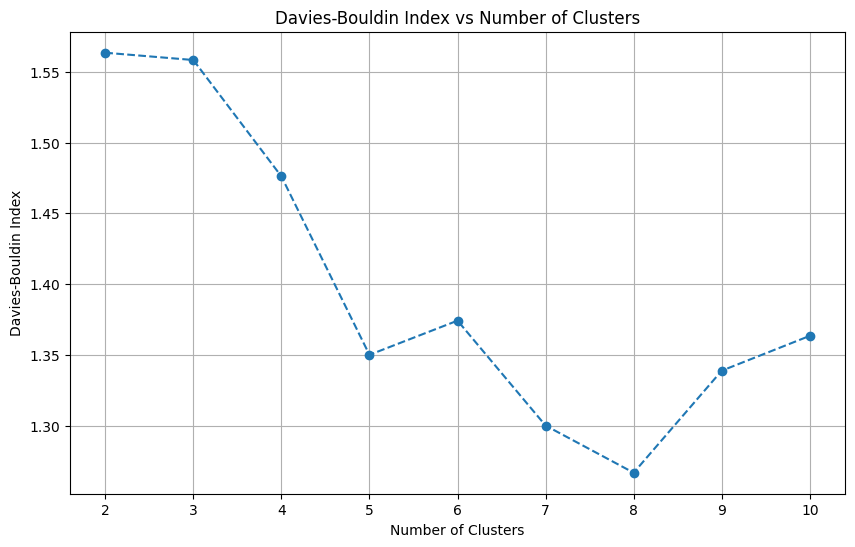

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o', linestyle='--')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(cluster_range)
plt.grid()
plt.show()



In [33]:
print("DB Scores:", db_scores)

DB Scores: [1.5633663333289487, 1.55821694905307, 1.476086913710689, 1.3501820928752477, 1.3743047012824652, 1.3002492078161487, 1.2669968705047585, 1.3389960530138072, 1.3635800346642106]


In [34]:
range_n_clusters = range(2, 11)  # Assuming the clustering was performed for 2 to 10 clusters



In [36]:
print(f"DB Scores (length {len(db_scores)}): {db_scores}")
print(f"Range of Clusters (length {len(range_n_clusters)}): {list(range_n_clusters)}")



DB Scores (length 9): [1.5633663333289487, 1.55821694905307, 1.476086913710689, 1.3501820928752477, 1.3743047012824652, 1.3002492078161487, 1.2669968705047585, 1.3389960530138072, 1.3635800346642106]
Range of Clusters (length 9): [2, 3, 4, 5, 6, 7, 8, 9, 10]


In [28]:
import seaborn as sns

In [29]:
final_kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
customer_features["Cluster"] = final_kmeans.fit_predict(clustering_data)

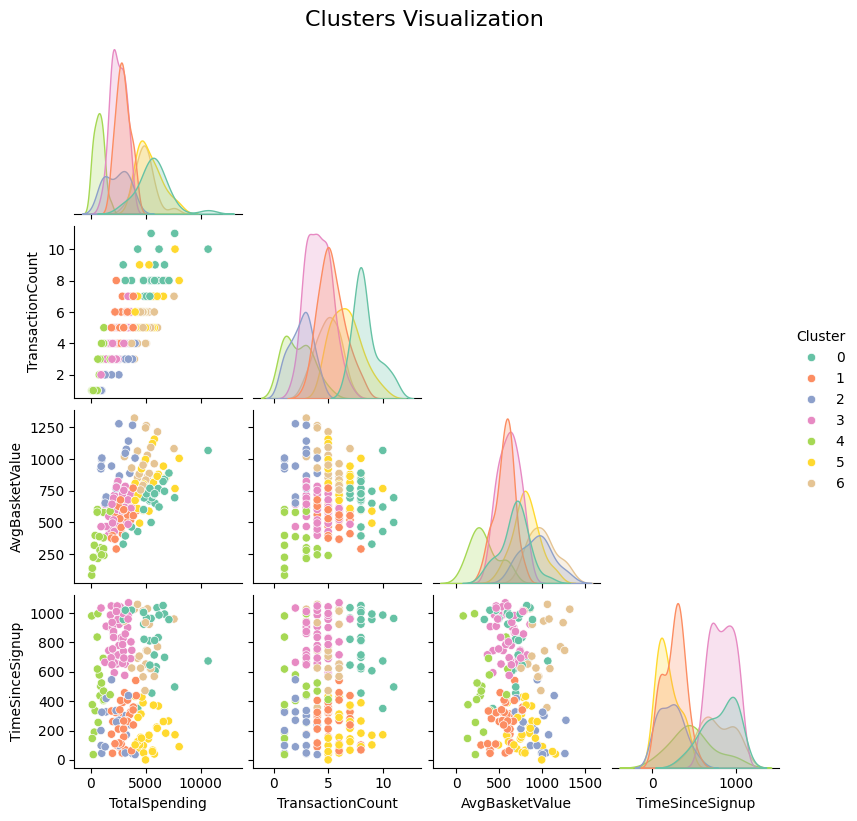

In [30]:
sns.pairplot(
    customer_features,
    vars=["TotalSpending", "TransactionCount", "AvgBasketValue", "TimeSinceSignup"],
    hue="Cluster",
    palette="Set2",
    diag_kind="kde",
    corner=True,
    height=2,
)
plt.suptitle("Clusters Visualization", y=1.02, fontsize=16)
plt.show()

In [31]:
customer_features.head()

,CustomerID,TotalSpending,TransactionCount,AvgBasketValue,Region,TimeSinceSignup,Cluster
0,C0001,3354.52,5,670.904,South America,902,3
1,C0002,1862.74,4,465.685,Asia,1049,3
2,C0003,2725.38,4,681.345,South America,296,1
3,C0004,5354.88,8,669.360,South America,811,0
4,C0005,2034.24,3,678.080,Asia,866,3


In [32]:
numerical_features_for_plot = customer_features[
    ["TotalSpending", "TransactionCount", "AvgBasketValue", "TimeSinceSignup", "Cluster"]

SyntaxError: incomplete input (<ipython-input-32-f572725899d4>, line 2)